<a href="https://colab.research.google.com/github/ViniSpeck/ML/blob/main/RFR_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
!pip install yfinance
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [292]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from scipy import stats
from numpy.random import randn
from numpy import random as rn
import numpy as np
import statsmodels.api as sm
from statsmodels import regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import set_config
from matplotlib import pyplot as plt
import quandl as q
from datetime import datetime
from calendar import monthrange
import seaborn as sns
%matplotlib inline

In [293]:
# Definindo parâmetros 
ticker = 'AAPL'
sp500_ticker = '^GSPC'
start_date = '2015-01-01'
end_date = datetime.now()

# Extraindo dados do token/ação desejada
df = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
df = df.reindex(index=df.index[::-1])
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-17,146.429993,151.479996,146.270004,150.720001,150.720001,79999076
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300
2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800


In [294]:
df.rename(columns={'Adj Close': 'Price'},inplace=True)
df

,Open,High,Low,Close,Price,Volume
Date,,,,,,
2022-11-17,146.429993,151.479996,146.270004,150.720001,150.720001,79999076
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300
2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800
...,...,...,...,...,...,...
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.179298,237458000
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247644,160423600
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912344,263188400


In [295]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Price     0
Volume    0
dtype: int64

In [296]:
df['Return'] = 0.000
for x in range(df['Price'].shape[0]-1):
  df['Return'][x]= np.log(df['Price'][x]/df['Price'][x+1])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Price,Volume,Return
Date,,,,,,,
2022-11-17,146.429993,151.479996,146.270004,150.720001,150.720001,79999076,0.012888
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300,-0.008366
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300,0.011800
2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100,-0.009531
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800,0.019085
...,...,...,...,...,...,...,...
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.179298,237458000,0.037703
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247644,160423600,0.013925
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912344,263188400,0.000094


In [297]:
# Pegando os dados do rendimento do tesouro americano para definir a variável de renda fixa.
treasury = q.get('USTREASURY/YIELD', trim_start=start_date, returns='pandas')
# Criando uma variável para o número de dias no mês corrente
cur_month_length = monthrange(datetime.now().year, datetime.now().month)[1]

# A variável de renda fixa dá o rendimento por dia.
rf = treasury['1 MO'][-1]/cur_month_length

In [298]:
df2 = pdr.get_data_yahoo([sp500_ticker], start=start_date, end=end_date)

df2.rename(columns={'Adj Close': 'US Treasury'},inplace=True)

conc_df = pd.concat([df, df2['US Treasury']], axis=1)
conc_df['US Treasury'].interpolate(method='linear', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [299]:
conc_df.corr()
conc_df.head()

,Open,High,Low,Close,Price,Volume,Return,US Treasury
Date,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.603207,212818400,0.000000,2058.199951
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.910091,257142000,-0.028576,2020.579956
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912344,263188400,0.000094,2002.609985
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247644,160423600,0.013925,2025.900024
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.179298,237458000,0.037703,2062.139893


In [300]:
y = conc_df['Price']
conc_df.drop(['Price'], axis=1,inplace=True)
x = conc_df

x = scale(x)
y = scale(y)

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.10)

In [301]:
set_config(print_changed_only=False) 
 
rfr = RandomForestRegressor()
 
rfr.fit(xtrain, ytrain)

score = rfr.score(xtrain, ytrain)
print("R-squared:", score) 

R-squared: 0.9999947732858522


In [302]:
ypred = rfr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  3.6789945195861354e-05
RMSE:  1.8394972597930677e-05


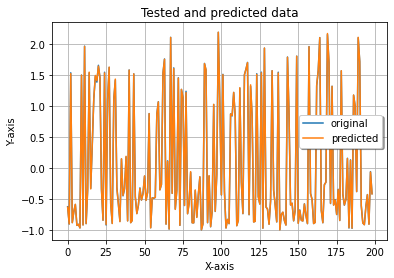

In [303]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Tested and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()